In [1]:
import imageio
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def load_images(npz_file):
  bundle = np.load(str(npz_file), allow_pickle=True)
  num_frames = bundle["num_frames"]

  # Extract poses, intrinsics, images.
  images = []
  for i in range(num_frames):
    

    # Images.
    image = (bundle[f"img_{i}"] / 255.).astype(np.float32)
    images.append(image)

  return np.stack(images)

def save_images(images, npz_file, k=0):
    new_image_dir = npz_file.parent / npz_file.stem / "images"
    new_image_dir.mkdir(exist_ok=True, parents=True)
    for i in range(images.shape[0]):
        filename = new_image_dir / f"img_{i:02}.png"
        image_u8 = np.clip(images[i] * 255, 0, 255).astype(np.uint8)
        imageio.imsave(filename, np.rot90(image_u8, k, axes=(0, 1)))

In [6]:
npz_file = Path("data/pink_flower.npz")
images = load_images(npz_file)
k = 0 # 1: Rotate 90 degrees once before saving.

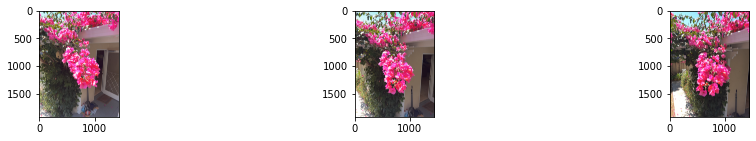

In [7]:
%matplotlib inline
num_frames = images.shape[0]

fig = plt.figure(figsize=(16, 16))
for i, img in enumerate(images[:3]):
    plt.subplot(int(np.ceil(num_frames / 3)), 3, i+1)
    plt.imshow(np.rot90(img, k, axes=(0, 1)))

In [8]:
save_images(images, npz_file, k)